<br><br>
<center><font size='5'><b>Deep Learning for All_pytorch</b></font><br><br><font size='5'>RNN<b></b></font>

In [23]:
import torch
import torch.optim as optim
import numpy as np

# Longseq

- 더 긴 dataset
- 아주 긴 문장을 chunk로 잘라서 사용하려고 함

## long sentence에서 sequence dataset 만들기

![image](https://user-images.githubusercontent.com/48466625/62610975-b27b1600-b93f-11e9-964c-4cf44b96564e.png)

- windowing 하면서 Input과 Output을 만들어냄

In [1]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [4]:
char_set = list(set(sentence))
print(char_set)

['a', ' ', 'p', 'n', 'r', 'd', 'k', 't', 'o', '.', 'w', 'y', 'h', 'u', "'", 'l', 'c', 'b', 's', 'i', 'e', 'g', ',', 'f', 'm']


In [5]:
# make dict

char_dic = {c:i for i, c in enumerate(char_set)}
print(char_dic)

{'a': 0, ' ': 1, 'p': 2, 'n': 3, 'r': 4, 'd': 5, 'k': 6, 't': 7, 'o': 8, '.': 9, 'w': 10, 'y': 11, 'h': 12, 'u': 13, "'": 14, 'l': 15, 'c': 16, 'b': 17, 's': 18, 'i': 19, 'e': 20, 'g': 21, ',': 22, 'f': 23, 'm': 24}


In [6]:
# hyper parameters

input_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10 # 청크 크기
learning_rate=0.1

180

In [16]:
x_data = []
y_data =[]

for i in range(0, len(sentence)-sequence_length): #0~(180-10)
    x_str = sentence[i : i + sequence_length] # string 값을 뽑고
    y_str = sentence[i+1 : i + sequence_length + 1]
    print(i, x_str, '============>', y_str)
    
    x_data.append([char_dic[c] for c in x_str]) # x_str to index로 변환한 후 
    y_data.append([char_dic[c] for c in y_str]) # y_str to index
    
x_one_hot = [np.eye(input_size)[x] for x in x_data] # 원핫인코딩

0 if you wan ============> f you want
1 f you want ============>  you want 
2  you want  ============> you want t
3 you want t ============> ou want to
4 ou want to ============> u want to 
5 u want to  ============>  want to b
6  want to b ============> want to bu
7 want to bu ============> ant to bui
8 ant to bui ============> nt to buil
9 nt to buil ============> t to build
10 t to build ============>  to build 
11  to build  ============> to build a
12 to build a ============> o build a 
13 o build a  ============>  build a s
14  build a s ============> build a sh
15 build a sh ============> uild a shi
16 uild a shi ============> ild a ship
17 ild a ship ============> ld a ship,
18 ld a ship, ============> d a ship, 
19 d a ship,  ============>  a ship, d
20  a ship, d ============> a ship, do
21 a ship, do ============>  ship, don
22  ship, don ============> ship, don'
23 ship, don' ============> hip, don't
24 hip, don't ============> ip, don't 
25 ip, don't  ============> p, don'

In [21]:
np.shape(x_one_hot)
# (배치사이즈, 시퀀스길이, 인풋사이즈 )
# 많지 않으니 mini-batch로 사용하진 않을것 

(170, 10, 25)

In [24]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

## FC layer를 추가하고 stacking RNN 만들기

![image](https://user-images.githubusercontent.com/48466625/62612398-43eb8780-b942-11e9-89c5-6e826c813a6a.png)

In [36]:
# RNN + FC layer를 선언해주기

class RNNwithFC(torch.nn.Module):
    
    # RNNwithFC 라는 모듈이 어떤 하위모델을 사용하는지. 여기선 nn.RNN과 nn.Linear를 사용
    def __init__(self, input_dim, hidden_dim, layers):
        super(RNNwithFC, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)
        
    # 네트워크 어떻게 계산할지 정의
    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [37]:
net = RNNwithFC(input_size, hidden_size, 2) # 2단 레이어

In [38]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [43]:
# start training
for i in range(50):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2) # argmax를 통해 prediction이 가장 큰 값을 구해오고,
    predict_str = ""
    for j, result in enumerate(results):
        # print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]

    print(predict_str)

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the sea.
p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the sea.
g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the sea.
t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the sea.
g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the sea.
m you want to build a ship, don't drum up people together to collect wood and don't assign them task

# Time series

![image](https://user-images.githubusercontent.com/48466625/62613341-3f27d300-b944-11e9-92f1-55b94c9fada3.png)

- MANY-TO-ONE
- __7일간의 주식 데이터를 받아서 8일째의 CLOSE가를 예측하는__
  - 여기서는 인풋이 5개 차원이고, 아웃풋은 1개 차원이니까,
  - hidden state의 사이즈를 충분히 해서, 예를 들면 arbitrary 10개,
  - 마지막을 FC 레이어로 연결해서 1개 값을 산출하게끔 하는 것이 일반적.
  - hidden_state를 1개의 dimension으로 유통하게 하려면 모델이 굉장히 부담됨.

## 데이터 불러오기

In [ ]:
# import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [46]:
seq_length = 7 # 시퀀스길이
data_dim = 5 # 5개의 데이터 
hidden_dim = 10 # 히든 디멘젼
ouutput_dim = 1 # 종가 1개만 예측

learning_rate = 0.01
iterations = 500

In [49]:
xy = np.loadtxt('./data/data-02-stock_daily.csv', delimiter=",")

In [53]:
xy.shape

(732, 5)

In [85]:
xy

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

In [86]:
# 역순으로 reverse해주기 
xy[::-1]

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [87]:
xy = xy[::-1]

train_size = int(len(xy) * 0.7)

# train과 test의 전체 set
train_set = xy[0:train_size, :]
test_set = xy[train_size-seq_length:, :]

In [63]:
train_set.shape

(512, 5)

In [65]:
test_set.shape

(227, 5)

## Data normalize

- 주가는 800선인데, 거래량은 100만 단위. 부담을 없애주기 위해서 모두다 0~1사이로 

In [67]:
def minmax_scaler(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [68]:
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

## train, testset을 seq_length에 맞게 나눠주기

In [69]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "--------------------------->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [70]:
# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[0.97125436 0.97337226 1.         0.06773081 0.98742313]
 [0.95353593 0.95651845 0.978622   0.10064206 0.97616367]
 [0.94382833 0.94502159 0.97008016 0.07092699 0.96390035]
 [0.94203759 0.94063577 0.96845162 0.0730233  0.94765398]
 [0.94090667 0.94063577 0.96056462 0.04948438 0.95226454]
 [0.93148189 0.93424193 0.95893608 0.06306814 0.94846947]
 [0.91797309 0.91635754 0.9407033  0.05658178 0.93099987]] ---------------------------> [0.91810943]
[[0.95353593 0.95651845 0.978622   0.10064206 0.97616367]
 [0.94382833 0.94502159 0.97008016 0.07092699 0.96390035]
 [0.94203759 0.94063577 0.96845162 0.0730233  0.94765398]
 [0.94090667 0.94063577 0.96056462 0.04948438 0.95226454]
 [0.93148189 0.93424193 0.95893608 0.06306814 0.94846947]
 [0.91797309 0.91635754 0.9407033  0.05658178 0.93099987]
 [0.911093   0.90197848 0.92397101 0.04347744 0.91810943]] ---------------------------> [0.91440854]
[[0.94382833 0.94502159 0.97008016 0.07092699 0.96390035]
 [0.94203759 0.94063577 0.96845162 0.0730233

 [0.29973916 0.29671446 0.21052462 0.28303111 0.20458533]] ---------------------------> [0.22826488]
[[0.26031223 0.28233539 0.25200366 0.29845737 0.25392037]
 [0.33941748 0.35419897 0.32729829 0.15506171 0.31809056]
 [0.35600518 0.35758231 0.34926721 0.13644867 0.35613474]
 [0.3766769  0.37860263 0.34109274 0.27864106 0.37881063]
 [0.28541352 0.34138643 0.26780981 0.34863739 0.3506147 ]
 [0.29973916 0.29671446 0.21052462 0.28303111 0.20458533]
 [0.16807515 0.2399504  0.15924258 0.4928791  0.22826488]] ---------------------------> [0.29999364]
[[0.33941748 0.35419897 0.32729829 0.15506171 0.31809056]
 [0.35600518 0.35758231 0.34926721 0.13644867 0.35613474]
 [0.3766769  0.37860263 0.34109274 0.27864106 0.37881063]
 [0.28541352 0.34138643 0.26780981 0.34863739 0.3506147 ]
 [0.29973916 0.29671446 0.21052462 0.28303111 0.20458533]
 [0.16807515 0.2399504  0.15924258 0.4928791  0.22826488]
 [0.37787072 0.36751284 0.31021499 0.35139175 0.29999364]] ---------------------------> [0.40772806]
[

 [0.31279686 0.29419203 0.33314282 0.25629264 0.32946972]] ---------------------------> [0.33951528]
[[0.20068325 0.19019961 0.14999043 0.47288873 0.16816387]
 [0.29029813 0.28326028 0.26205457 0.24716243 0.21819755]
 [0.28640601 0.30246042 0.32170769 0.14940602 0.3405776 ]
 [0.37127411 0.3493118  0.36258825 0.24708892 0.34173686]
 [0.30814535 0.33948206 0.34610247 0.27899318 0.37477085]
 [0.31279686 0.29419203 0.33314282 0.25629264 0.32946972]
 [0.21122088 0.30760497 0.27406125 0.3956569  0.33951528]] ---------------------------> [0.23761241]
[[0.29029813 0.28326028 0.26205457 0.24716243 0.21819755]
 [0.28640601 0.30246042 0.32170769 0.14940602 0.3405776 ]
 [0.37127411 0.3493118  0.36258825 0.24708892 0.34173686]
 [0.30814535 0.33948206 0.34610247 0.27899318 0.37477085]
 [0.31279686 0.29419203 0.33314282 0.25629264 0.32946972]
 [0.21122088 0.30760497 0.27406125 0.3956569  0.33951528]
 [0.21387897 0.20783782 0.14522584 0.48923783 0.23761241]] ---------------------------> [0.22824311]
[

In [71]:
# to Tensor

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

## Model 만들고 train

In [72]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

In [74]:
seq_length = 7 # 시퀀스길이
data_dim = 5 # 5개의 데이터 
hidden_dim = 10 # 히든 디멘젼
output_dim = 1 # 종가 1개만 예측

learning_rate = 0.01
iterations = 500

In [75]:
net = Net(data_dim, hidden_dim, output_dim, 1)

In [76]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
#####################네트워크 출력값이 실수값이기 때문에, MSE loss를 할당 #############################

optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [77]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    
    if i % 50 == 0:
        print(i, loss.item())

0 0.8497791886329651
50 0.0025526033714413643
100 0.001170342555269599
150 0.001072021434083581
200 0.0010191755136474967
250 0.0009720209054648876
300 0.000927422137465328
350 0.0008847991121001542
400 0.0008439211524091661
450 0.0008047741721384227


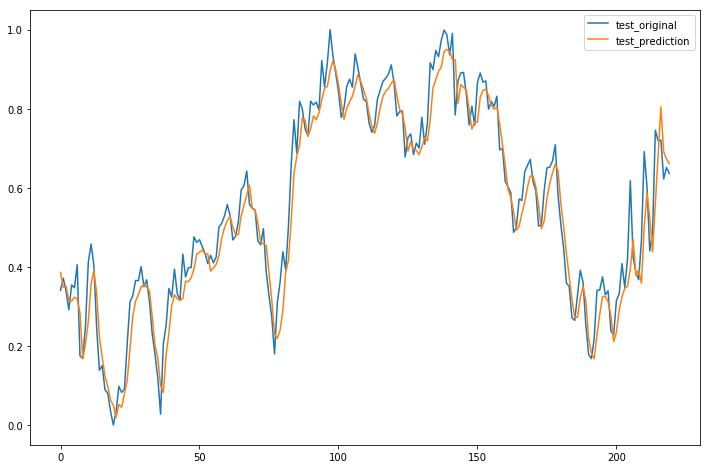

In [102]:
plt.figure(figsize=(12,8))
plt.plot(testY) # 8일차 종가에 해당하는 테스트셋 값을 플랏팅
plt.plot(net(testX_tensor).data.numpy()) # 그거에 대한 예측
plt.legend(['test_original', 'test_prediction'])
plt.show()

# Seq2Seq (번역 task)

- 시퀀스를입력받고, 시퀀스를 출력하는 모델 
- 챗봇이나, 번역 task

![image](https://user-images.githubusercontent.com/48466625/62620627-c715d900-b954-11e9-84ad-cf746caeb9d4.png)

- RNN 같은 것은 문장을 다 듣기도 전에, 답변을 만들기 때문에,,, 적절하지 않다.

## Encoder-Decoder 구조

![image](https://user-images.githubusercontent.com/48466625/62620861-53c09700-b955-11e9-928e-f97762a0147a.png)

- 입력된 시퀀스를 Vector 형태로 압축 -> 압축된 벡터를 디코더에 전달 -> 디코더 부분 첫 hidden state 시작 
- Yes 출력하고 그게 다시 인풋으로 들어가서, 히든스테이트와 함께 What's 출력 --> 이렇게 시퀀스를 출력

## 데이터 전처리 및 필요 함수들 만들기

In [124]:
import random
import torch
import torch.nn as nn
from torch import optim

In [138]:
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [125]:
raw = ["I feel hungry.	나는 배가 고프다.",
       "Pytorch is very easy.	파이토치는 매우 쉽다.",
       "Pytorch is a framework for deep learning.	파이토치는 딥러닝을 위한 프레임워크이다.",
       "Pytorch is very clear to use.	파이토치는 사용하기 매우 직관적이다."]

- 디코더가 첫번째 hiddenstate를 받고, 첫번째 인풋을 넣어줄때 SOS_token을 넣어줌
- 문장이 끝나게 되면, 끝났다라고 문장의 종료를 알려주는 EOS_token

In [126]:
SOS_token = 0
EOS_token = 1

In [127]:
# filter out the long sentence from source and target data
def filter_pair(pair, source_max_length, target_max_length):
    return len(pair[0].split(" ")) < source_max_length and len(pair[1].split(" ")) < target_max_length

In [128]:
# class for vocabulary related information of data
class Vocab:
    def __init__(self):
        self.vocab2index = {"<SOS>": SOS_token, "<EOS>": EOS_token}
        self.index2vocab = {SOS_token: "<SOS>", EOS_token: "<EOS>"}
        self.vocab_count = {}
        self.n_vocab = len(self.vocab2index)

    def add_vocab(self, sentence):
        for word in sentence.split(" "):
            if word not in self.vocab2index:
                self.vocab2index[word] = self.n_vocab
                self.vocab_count[word] = 1
                self.index2vocab[self.n_vocab] = word
                self.n_vocab += 1
            else:
                self.vocab_count[word] += 1

In [129]:
# 소스텍스트와 타겟텍스트를 나눠가지고, 어떤 단어로 구성이 되었고, 단어수는 몇개고를 측정하는 과정

def preprocess(corpus, source_max_length, target_max_length):
    print("reading corpus...")
    pairs = []
    for line in corpus:
        pairs.append([s for s in line.strip().lower().split("\t")]) #tab으로 구분해서 나눠서,
    print("Read {} sentence pairs".format(len(pairs)))

    pairs = [pair for pair in pairs if filter_pair(pair, source_max_length, target_max_length)]
    print("Trimmed to {} sentence pairs".format(len(pairs)))

    source_vocab = Vocab() # 단어의 갯수나 단어의 딕셔너리를 Vocab 클래스를 선언해서 저장해둠
    target_vocab = Vocab()

    print("Counting words...")
    for pair in pairs:
        source_vocab.add_vocab(pair[0])
        target_vocab.add_vocab(pair[1])
    print("source vocab size =", source_vocab.n_vocab)
    print("target vocab size =", target_vocab.n_vocab)

    return pairs, source_vocab, target_vocab

In [130]:
# declare simple encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size) 
        
        # inputsize : 소스텍스트의 단어 갯수,
        # 단어 갯수만큼 원핫인코딩 되서, 임베딩과 곱해지면
        # 차원 줄이고자 하는 hidden_size가 되서,
        
        self.gru = nn.GRU(hidden_size, hidden_size)
        # GRU에 인풋으로 들어간다.

    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1) #
        x, hidden = self.gru(x, hidden)
        return x, hidden

In [131]:
# declare simple decoder
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.gru(x, hidden)
        x = self.softmax(self.out(x[0])) # out 추가
        return x, hidden

In [132]:
#convert sentence to the index tensor
#sentence를 원핫인코딩으로 바꾸고, 그것을 텐서로 바꾸는,
def tensorize(vocab, sentence):
    indexes = [vocab.vocab2index[word] for word in sentence.split(" ")]
    indexes.append(vocab.vocab2index["<EOS>"])
    return torch.Tensor(indexes).long().to(device).view(-1, 1)

In [133]:
# training seq2seq
def train(pairs, source_vocab, target_vocab, encoder, decoder, n_iter, print_every=1000, learning_rate=0.01):
    loss_total = 0

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    
    # 전체 데이터셋에서 필요한 갯수만큼 랜덤하게 추출하고, 소스텍스트와 타겟텍스트를 나누는.
    training_batch = [random.choice(pairs) for _ in range(n_iter)]
    training_source = [tensorize(source_vocab, pair[0]) for pair in training_batch]
    training_target = [tensorize(target_vocab, pair[1]) for pair in training_batch]

    criterion = nn.NLLLoss() # 카테고리 value 끼리의 비교를 위해

    for i in range(1, n_iter + 1):
        source_tensor = training_source[i - 1]
        target_tensor = training_target[i - 1]

        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device) # 맨처음에 들어가는 히든스테이트 없으니 0으로 만들어서 넣음

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        source_length = source_tensor.size(0)
        target_length = target_tensor.size(0)

        loss = 0

        for enc_input in range(source_length):
            _, encoder_hidden = encoder(source_tensor[enc_input], encoder_hidden)

        decoder_input = torch.Tensor([[SOS_token]]).long().to(device) ####### 디코더에서 맨처음에 들어가는 인풋값
        decoder_hidden = encoder_hidden ####################### 디코더에서 맨처음에 들어가는 히든값 = 인코더에서의 히든값

        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  
            # teacher forcing
            ### GRU 예측값이 다음 입력으로 들어갈 수도 있지만 그렇게 안하고,
            ### 직접 정답을 인풋으로 넣어주는 것을 teacher forcing.  
            ### 50% 확률로 teacher forcing을 하고 나머지는 예측값이 들어가고 이렇게 할 수도 있음.

        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        loss_iter = loss.item() / target_length
        loss_total += loss_iter

        if i % print_every == 0:
            loss_avg = loss_total / print_every
            loss_total = 0
            print("[{} - {}%] loss = {:05.4f}".format(i, i / n_iter * 100, loss_avg))

In [134]:
# insert given sentence to check the training
def evaluate(pairs, source_vocab, target_vocab, encoder, decoder, target_max_length):
    for pair in pairs:
        print(">", pair[0])
        print("=", pair[1])
        source_tensor = tensorize(source_vocab, pair[0])
        source_length = source_tensor.size()[0]
        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device)

        for ei in range(source_length):
            _, encoder_hidden = encoder(source_tensor[ei], encoder_hidden)

        decoder_input = torch.Tensor([[SOS_token]], device=device).long()
        decoder_hidden = encoder_hidden
        decoded_words = []

        for di in range(target_max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            _, top_index = decoder_output.data.topk(1)
            if top_index.item() == EOS_token:
                decoded_words.append("<EOS>")
                break
            else:
                decoded_words.append(target_vocab.index2vocab[top_index.item()])

            decoder_input = top_index.squeeze().detach()

        predict_words = decoded_words
        predict_sentence = " ".join(predict_words)
        print("<", predict_sentence)
        print("")

## train

In [135]:
# declare max length for sentence
SOURCE_MAX_LENGTH = 10
TARGET_MAX_LENGTH = 12

In [136]:
# preprocess the corpus
load_pairs, load_source_vocab, load_target_vocab = preprocess(raw, SOURCE_MAX_LENGTH, TARGET_MAX_LENGTH)
print(random.choice(load_pairs))

reading corpus...
Read 4 sentence pairs
Trimmed to 4 sentence pairs
Counting words...
source vocab size = 17
target vocab size = 13
['pytorch is very clear to use.', '파이토치는 사용하기 매우 직관적이다.']


In [139]:
# declare the encoder and the decoder
enc_hidden_size = 16
dec_hidden_size = enc_hidden_size
enc = Encoder(load_source_vocab.n_vocab, enc_hidden_size).to(device)
dec = Decoder(dec_hidden_size, load_target_vocab.n_vocab).to(device)

In [140]:
# train seq2seq model
train(load_pairs, load_source_vocab, load_target_vocab, enc, dec, 5000, print_every=1000)

[1000 - 20.0%] loss = 0.7413
[2000 - 40.0%] loss = 0.1078
[3000 - 60.0%] loss = 0.0327
[4000 - 80.0%] loss = 0.0179
[5000 - 100.0%] loss = 0.0124


In [141]:
# check the model with given data
evaluate(load_pairs, load_source_vocab, load_target_vocab, enc, dec, TARGET_MAX_LENGTH)

> i feel hungry.
= 나는 배가 고프다.
< 나는 배가 고프다. <EOS>

> pytorch is very easy.
= 파이토치는 매우 쉽다.
< 파이토치는 매우 쉽다. <EOS>

> pytorch is a framework for deep learning.
= 파이토치는 딥러닝을 위한 프레임워크이다.
< 파이토치는 딥러닝을 위한 프레임워크이다. <EOS>

> pytorch is very clear to use.
= 파이토치는 사용하기 매우 직관적이다.
< 파이토치는 사용하기 매우 직관적이다. <EOS>



# PackedSequence

https://github.com/deeplearningzerotoall/PyTorch/blob/master/lab-11_6_PackedSequence.ipynb
- 시퀀스 데이터는, 길이가 매번 달라지거나 미정인 경우가 많다. 
- 똑같은 배치 사이즈를 만들기 위해..

![image](https://user-images.githubusercontent.com/48466625/62623419-bb79e080-b95b-11e9-84b7-4c1bc00066ff.png)

![image](https://user-images.githubusercontent.com/48466625/62623621-4529ae00-b95c-11e9-9303-8c2e45704ec3.png)

## Padding

- pad라는 token
![image](https://user-images.githubusercontent.com/48466625/62623450-d3e9fb00-b95b-11e9-998a-5f760b171156.png)

## Packing

![image](https://user-images.githubusercontent.com/48466625/62623479-e6643480-b95b-11e9-9422-d7294e69e1b5.png)

![image](https://user-images.githubusercontent.com/48466625/62623490-f11ec980-b95b-11e9-8ae7-446f54e4cc1c.png)

- 길이 내림차순으로 정렬해야 packing이 파이토치에서 동작함